<a href="https://colab.research.google.com/github/Abhishekmalakar/ML-Titanic-pridiction/blob/main/Titanic_dataset_lodistic_regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing Titanic Dataset**

Prepared  By **Abhishek M**
              **DS-1**


In this notbook, we perform five steps on the Titanic data set:

1.Reading Data
2.Visualizing Data
3.Analyzing Data
4.Cleaning Data
5.Modeling Data: To model the dataset, we apply logistic regression.

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
import sklearn


In [ ]:
import matplotlib.pyplot as plt
import seaborn
from sklearn import model_selection
from sklearn .linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
%matplotlib inline
import math

Reading Dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/titanic.csv")

In [ ]:
data.head(25)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Summerizing the dataset

In [ ]:
data.shape


(891, 15)

In [ ]:
#Check that how many are survivedand how many died

data.groupby("survived").size()


survived
0    549
1    342
dtype: int64

Visualizing the data set

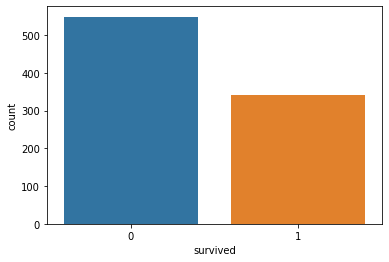

In [ ]:
seaborn.countplot(x="survived",data=data)

above graph say's that more people died than survived

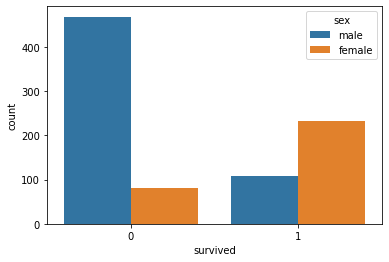

In [ ]:
seaborn.countplot(x='survived',hue="sex",data=data)

More women died rather man

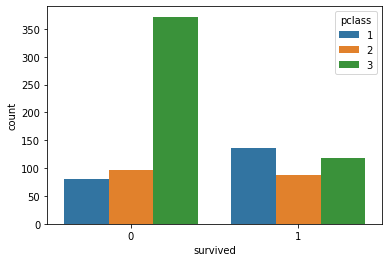

In [ ]:
seaborn.countplot(x="survived",hue='pclass',data=data)

3rd class people died more

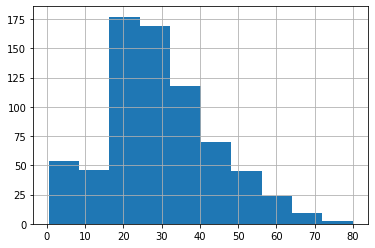

In [ ]:
data['age'].hist()

Here we see that the passenger between 18 and 40 are more

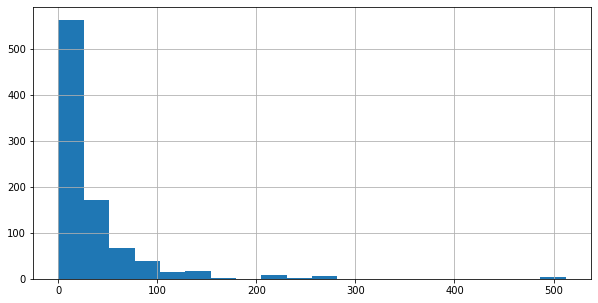

In [ ]:
data['fare'].hist(bins=20,figsize=(10,5))

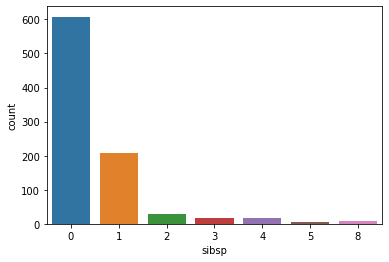

In [ ]:
seaborn.countplot(x="sibsp",data=data)

The the mejority of passengers were alon orf with one family member.


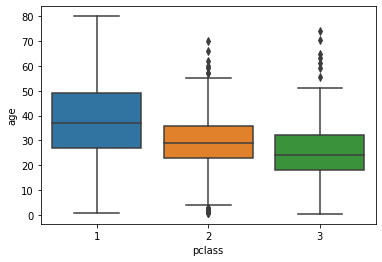

In [ ]:
seaborn.boxplot(x='pclass',y='age',data=data)


first and second class passengers were older

**bold text**Now Check the null values and clean the data set

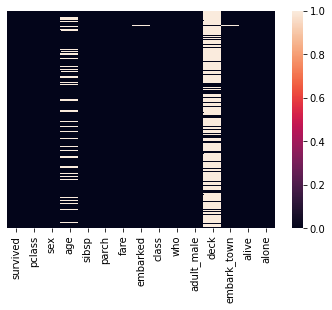

In [ ]:
seaborn.heatmap(data.isnull(),yticklabels=False)


In [ ]:
data.isnull().sum()



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
clean_data=data.drop(columns=['who','adult_male','deck','embark_town','alone','alive','embarked'],axis=1,inplace=True)

In [ ]:
data.fillna(0,inplace=True)


In [ ]:
data.isnull().sum()


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
class       0
dtype: int64

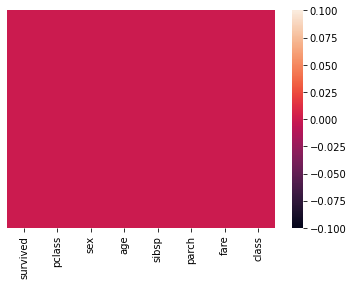

In [ ]:
seaborn.heatmap(data.isnull(),yticklabels=False)

To Apply logistic regression all the culumns should have categorical or numerical values

In [ ]:
pd.get_dummies(data['sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
binary_data=pd.get_dummies(data['sex'],drop_first=True)

In [ ]:
binary_data.head(5)


,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
pd.get_dummies(data['pclass']).head(5)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
binary_Pclass = pd.get_dummies(data ['pclass'],drop_first = True)

In [ ]:
binary_Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
pd.get_dummies(data['class']).head(5)

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
binary_class = pd.get_dummies(data ['class'],drop_first = True)

In [ ]:
new_data=pd.concat([data,binary_data,binary_Pclass,binary_class],axis=1)

In [ ]:
new_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,male,Second,Third,Second,Third
0,0,3,male,22.0,1,0,7.2500,Third,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,First,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Third,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,First,0,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,Third,1,0,1,0,1


In [ ]:
final_data_set = new_data.drop (columns = ['sex', 'pclass','class'])
final_data_set.head (5)

,survived,age,sibsp,parch,fare,male,Second,Third,Second,Third
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
 final_data_set = final_data_set.replace(r'^\s*$', np.nan, regex=True) 

In [ ]:
final_data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   male      891 non-null    uint8  
 6   Second    891 non-null    uint8  
 7   Third     891 non-null    uint8  
 8   Second    891 non-null    uint8  
 9   Third     891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


**Modeling the data set**

In [ ]:
y=final_data_set['survived']
x=final_data_set.drop(['survived'],axis=1)

In [ ]:
x.head(5)


,age,sibsp,parch,fare,male,Second,Third,Second,Third
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
test_set_size=0.2
seed=1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=test_set_size,random_state=seed)

In [ ]:
model = LogisticRegression (solver = 'liblinear')

In [ ]:
model.fit (x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = model.predict (x_test)

In [ ]:
report = classification_report (y_test, predictions)

In [ ]:
print (report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       106
           1       0.80      0.66      0.72        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
print (confusion_matrix (y_test, predictions))

[[94 12]
 [25 48]]


In [ ]:
accuracy_score (y_test, predictions)

0.7932960893854749